# Part II - Ford GoBike Investigation
## by Abdulmohsen Ali Albareed


## Investigation Overview

### Overall Goals of the Presentation:

1.Provide an overview of the key insights from the analysis of the rider dataset.

2.Highlight the main threads of analysis and their significance.

3.Present visualizations and data summaries to support the findings.

4.Discuss the implications of the insights and their potential applications.

5.Facilitate a clear understanding of the rider characteristics, their impact on trip duration and distance, and the 

6.relationship between weekdays and ride patterns.


### Summary of Key Insights:

1.Thursday is the most popular day for riders to make a trip, while Sunday and Saturday have the fewest rides by subscribers.

2.Male riders outnumber female riders by 70%.

3.Trip durations range from 1 to 60 minutes, with a right-skewed distribution.

4.Trip distances range from 100 meters to 8 kilometers, also skewed to the right.

5.Birth dates of riders span from the 1940s to the 2000s, with a left-skewed distribution.

6.Riders heading to Parker Ave at McAllister St, Mendell St at Fairfax Ave, or Williams Ave at Apollo St will travel approximately 4 kilometers.

7.Riders starting their ride from Williams Ave at Apollo St will need to travel more than 5 kilometers to reach their destination.

8.Riders born between the 1960s and 1980s perform better in terms of duration and distance compared to those born in the 2000s.

9.Female riders take an average of 12.48 minutes to complete 1.7 kilometers, while male riders take 10.7 minutes to complete 1.6 
kilometers.

10.Riders tend to take more time on their trips during Saturdays and Sundays.


## Dataset Overview

The Ford GoBike system dataset provides anonymized, timestamped data about the start- and end- station for a bike,
the user type (subscriber or casual rider), as well as some customer-reported attributes like birth year and gender. 
If you’re already familiar with the CitiBike NYC or RideIndego datasets, the Ford GoBike dataset is similarly structured.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('Ford_GoBike_Cleaned.csv')
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,year,month,day_name,distance_km
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,869,2019,Feb,Thursday,0.543983
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,1030,2019,Feb,Thursday,2.705390
2,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974,Male,Yes,26,2019,Feb,Thursday,2.412017
3,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959,Male,No,29,2019,Feb,Thursday,3.328256
4,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,Subscriber,1983,Female,No,19,2019,Feb,Thursday,2.029323


In [3]:
#this function plotting the chart with title and x,y labels
def plotting(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Number of trips per days

Based on the dataset we have,we found that Thursday has the most trips in a week with more than 30k trips,while Sunday and Saturday have the lowest number of trips in the weekdays with almost 15k trips.

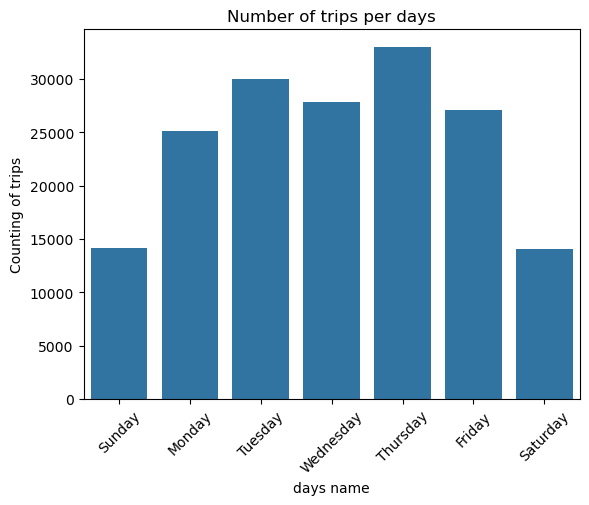

In [4]:
weekdays_in_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data=df,x='day_name',color=sb.color_palette()[0],order=weekdays_in_order)
plt.xticks(rotation=45)
plotting('days name','Counting of trips','Number of trips per days')

## the difference between Male and Female in the number of trips based on user type.

In the following chart, we will see that the customer made the most trips in both user types (customer or subscriber).

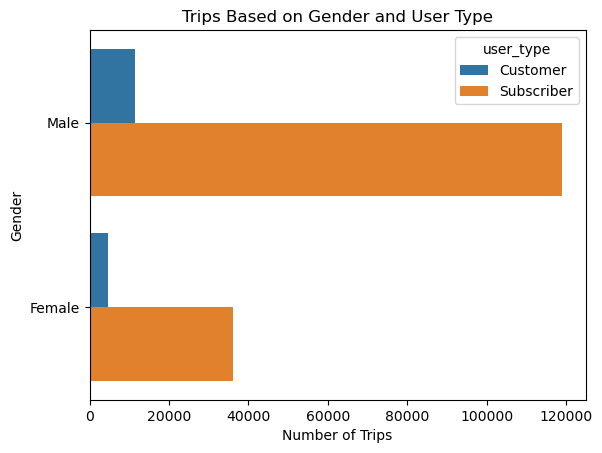

In [5]:
palette = ['#acaca4', '#7e7e87']
sb.countplot(data=df, y='member_gender', hue='user_type')
plotting('Number of Trips', 'Gender', 'Trips Based on Gender and User Type')

## the diffrence between Male and Female in duration and distance in trips.
During my investigation of the dataset,I found that female riders take an average of 12.48 minutes to complete 1.7 kilometers, while male riders take 10.7 minutes to complete 1.6 kilometers.


In [7]:
#getting the mean of distance in km and amount of time for trips for each variable that call this function
def data_by_distan_time(df,col):
   
    return df.groupby(col)[['duration_min','distance_km']].mean()
    

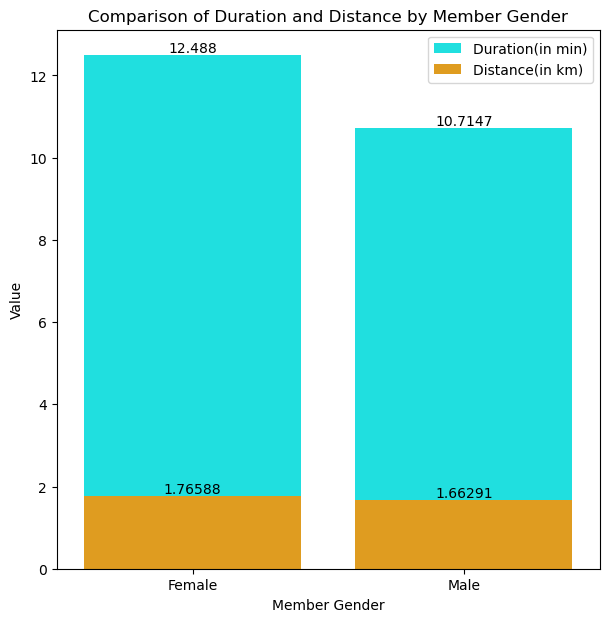

In [10]:
#getting the mean of distance in km and amount of time for trips for each gender
distan_time_by_gender=data_by_distan_time(df,'member_gender')
distan_time_by_gender.reset_index(inplace=True)

plt.figure(figsize=(7,7))


ax=sb.barplot(data=distan_time_by_gender, x="member_gender", y="duration_min", color="cyan", label="Duration(in min)")
ax=sb.barplot(data=distan_time_by_gender, x="member_gender", y="distance_km", color="orange", label="Distance(in km)")

# Add labels and title to the plot
plotting('Member Gender','Value','Comparison of Duration and Distance by Member Gender')

# Add a legend
plt.legend()

#write the values on top of each bar
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [12]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 687580 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\abdum\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\abdum\anaconda3\lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\abdum\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\abdum\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\abdum\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\abdum\